In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from datetime import datetime

In [34]:
T = 100
dt = 0.01
N = 647601

In [42]:
beta = 0
gama = 0.2

In [9]:
def f1(s, i, r, beta, gama):
    return -beta * s * i / N

def f2(s, i, r, beta, gama):
    return beta * s * i / N - gama * i

def f3(s, i, r, beta, gama):
    return gama * i

In [11]:
def try_param(beta, gama):
    S = np.zeros(int(T / dt) +1)
    I = np.zeros(int(T / dt) + 1)
    R = np.zeros(int(T / dt) + 1)
    
    S[0] = N -1
    I[0] = 1
    t = 0
    
    for i in range(int(T / dt)):
        t += dt
        S[i + 1] = S[i] + f1(S[i], I[i], R[i], beta, gama) * dt
        I[i + 1] = I[i] + f2(S[i], I[i], R[i], beta, gama) * dt
        R[i + 1] = R[i] + f3(S[i], I[i], R[i], beta, gama) * dt
    result = {
            "S": S,
            "I": I,
            "R": R
    }
    return result

In [46]:
results = []
colors = []
beta = 0
gama = 0.2
for i in range(100):
    results.append(try_param(beta, gama)["I"])
    colors.append((beta, 1 - beta, 1 - beta))
    beta += 1 /100

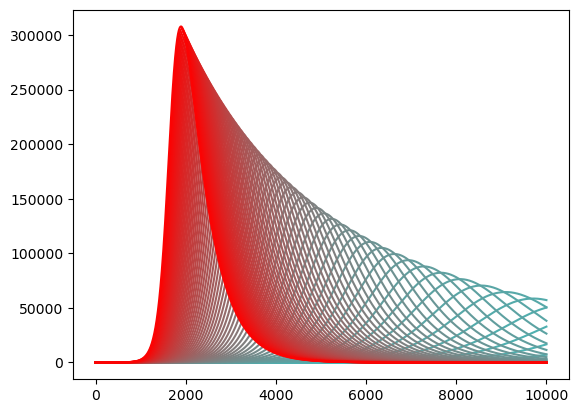

In [47]:
for i in range(100):
    plt.plot(results[i], color = colors[i])
plt.show()

In [50]:
beta = 0.5
gama = 0
results = []
colors = []
for i in range(1000):
    results.append(try_param(beta, gama)["I"])
    colors.append((gama, 1 - gama, 1 - gama))
    gama += 1 /1000

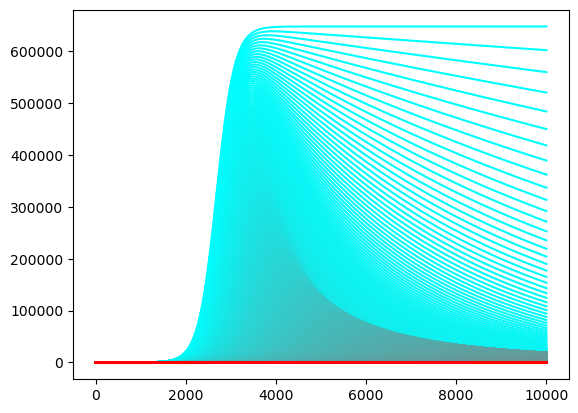

In [52]:
for i in range(1000):
    plt.plot(results[i], color = colors[i])
plt.show()